In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
import matplotlib.dates as mdates

In [125]:
data = pd.read_csv('prcp_monthly.csv')
data['month'] = pd.to_datetime(data['month'])
data.index = pd.date_range(start="2001-01-01", periods=len(data), freq="M")
data.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4760\2385477345.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start="2001-01-01", periods=len(data), freq="M")


,index,month,prcp
2001-01-31,0,2001-01-01,101.400000
2001-02-28,1,2001-02-01,98.200000
2001-03-31,2,2001-03-01,201.200000
2001-04-30,3,2001-04-01,141.200000
2001-05-31,4,2001-05-01,29.233333


<Figure size 2000x1000 with 0 Axes>

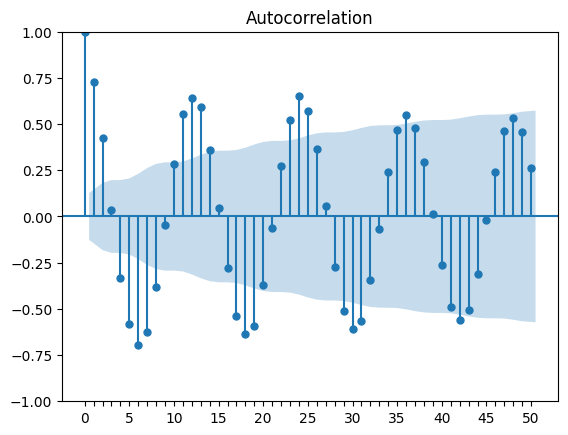

In [126]:
plt.figure(figsize=(20, 10))
plot_acf(data['prcp'], lags=50)
plt.xticks(ticks=range(0, 51), labels=[str(x) if x % 5 == 0 else '' for x in range(0, 51)])   
plt.show()

Lag = 1, 2 cho độ tự tương quan tương đối tốt -> xem xét sử dụng mô hình AR(1) hoặc AR(2)

## Train model:

#### Train test split:

In [127]:
train = data[data['month'].dt.year <= 2015]
test = data[data['month'].dt.year > 2015]

#### AR(1):

In [129]:
ar1 = AutoReg(train['prcp'], lags=1).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   prcp   No. Observations:                  180
Model:                     AutoReg(1)   Log Likelihood                -984.176
Method:               Conditional MLE   S.D. of innovations             59.101
Date:                Tue, 18 Feb 2025   AIC                           1974.353
Time:                        14:51:02   BIC                           1983.915
Sample:                    02-28-2001   HQIC                          1978.230
                         - 12-31-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2328      7.560      4.528      0.000      19.415      49.051
prcp.L1        0.7075      0.053     13.381      0.000       0.604       0.811
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4135           +0.0000j            1.4135            0.0000
-----------------------------------------------------------------------------
"""

Forecasting:

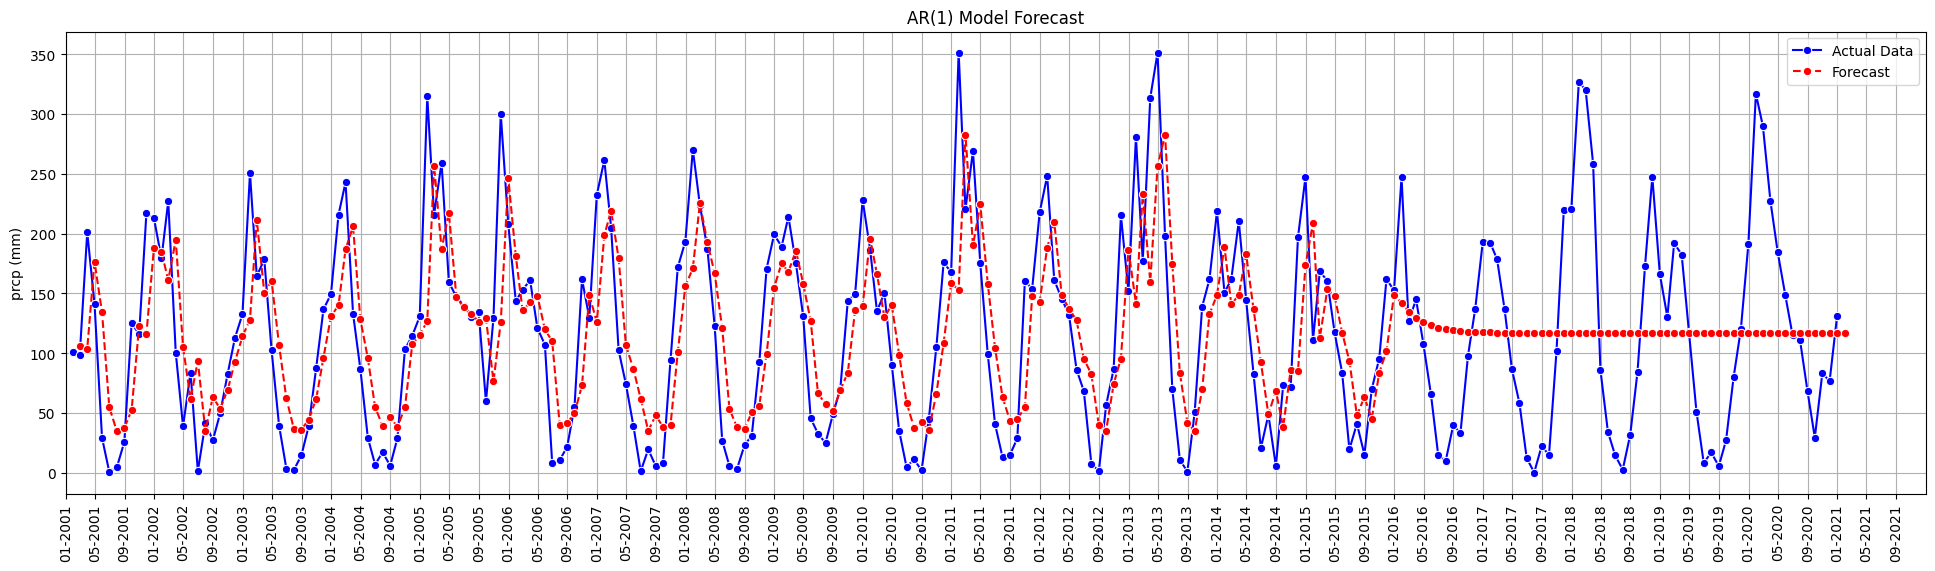

In [131]:

forecast_steps = 4
forecast_lag1 = ar1.predict(start=0, end=len(data))

plt.figure(figsize=(24, 6))
sns.lineplot(data["prcp"], label="Actual Data", color="blue", marker="o")
sns.lineplot(forecast_lag1, label="Forecast", color="red", linestyle="dashed", marker='o')
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2021-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.grid(True)
plt.ylabel("prcp (mm)")
plt.title("AR(1) Model Forecast")
plt.legend()
# plt.savefig('forecast/ar1.png')
plt.show()

Residual evaluation:

In [100]:
mse_lag1 = np.mean((forecast_lag1[:-forecast_steps] - data['prcp'])**2)
mse_lag1

np.float64(3373.9974856888743)

#### AR(2):

Fit model:

In [83]:
ar2 = AutoReg(data['prcp'], lags=2).fit()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   prcp   No. Observations:                  240
Model:                     AutoReg(2)   Log Likelihood               -1298.516
Method:               Conditional MLE   S.D. of innovations             56.657
Date:                Tue, 18 Feb 2025   AIC                           2605.032
Time:                        14:02:33   BIC                           2618.921
Sample:                    03-31-2001   HQIC                          2610.629
                         - 12-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0091      6.550      5.955      0.000      26.171      51.847
prcp.L1        0.8971      0.063     14.201      0.000       0.773       1.021
prcp.L2       -0.2295      0.063     -3.632      0.000      -0.353      -0.106
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9540           -0.7337j            2.0872           -0.0572
AR.2            1.9540           +0.7337j            2.0872            0.0572
-----------------------------------------------------------------------------
"""

Forecasting:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4760\2625455215.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start="2001-01-01", periods=len(data) + 12, freq="M")


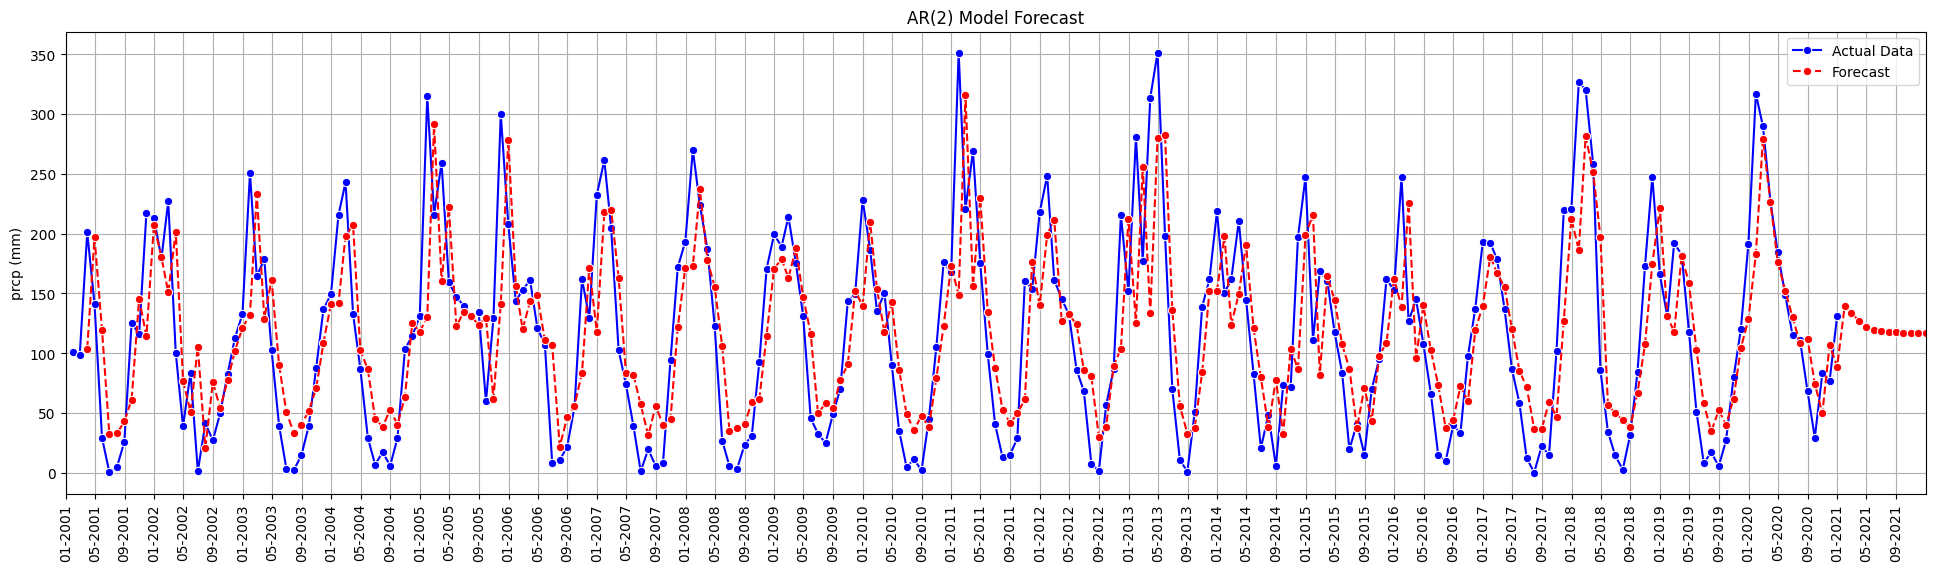

In [ ]:
forecast_steps = 12
forecast_lag2 = ar2.predict(start=0, end=len(data) + forecast_steps - 1)

# Tạo index thời gian cho dự báo
forecast_index = pd.date_range(start="2001-01-01", periods=len(data) + 12, freq="M")

# Vẽ kết quả
plt.figure(figsize=(24, 6))
sns.lineplot(data["prcp"], label="Actual Data", color="blue", marker="o")
sns.lineplot(forecast_lag2, label="Forecast", color="red", linestyle="dashed", marker='o')
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2021-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.grid(True)
plt.ylabel("prcp (mm)")
plt.title("AR(2) Model Forecast")
plt.legend()
# plt.savefig('forecast/ar2.png')
plt.show()

Residual evaluation:

In [102]:
mse_lag2 = np.mean((forecast_lag2[:-12] - data['prcp'])**2)
mse_lag2

np.float64(3209.9831700080367)